## Building a model to predict smoking behaviour 
**This is private data. Please do not share**

* __Date:__ 2017 - 12 - 18 
* __Version:__ 1.0
* __Editors:__ Fionn Delahunty 
* __Code:__ R

------- 
This notebook (R code) investigates if DOSPERT Scale (Risk Taking in a Recreational context) as a predictor of the number cigarette smoked in the sample data

Summary of steps
1. Dataset import 
------


In [1]:
# Dataset Import 
data <- read.csv(file="Risklab_2.4.csv", header=TRUE, sep=",")
names(data)
#head(data)

[1] "ID"                                                                            
 [2] "X"                                                                             
 [3] "Timestamp"                                                                     
 [4] "GENDER"                                                                        
 [5] "AGE"                                                                           
 [6] "DATE_OF_BIRTH"                                                                 
 [7] "NATIONALITY"                                                                   
 [8] "COUNTRY_OF_RESIDENCE"                                                          
 [9] "ENGLISH_FIRST_LENGUAGE"                                                        
[10] "IF_NOT_ENGLISH_SPECIFY"                                                        
[11] "HIGHEST_LEVEL_EDUCATION"                                                       
[12] "OCCUPATION"                                                                    
[13] "DOMINANT_HAND"                                                                 
[14] "DO_YOU_DRIVE"                                                                  
[15] "CURRENTLY_LEARNING_DRIVE"                                                      
[16] "CURRENTLY_HOLD_LEARNING_DRIVER_PERMIT"                                         
[17] "CURRENTLY_HOLD_FULL_DRIVING_LICENSE"                                           
[18] "RECEIVE_FULL_DRIVING_LICENSE"                                                  
[19] "AGE_STARTED_DRIVING"                                                           
[20] "AVERAGE_KM_MILEAGE_PER_YEAR"                                                   
[21] "HAVE_PENALTY_POINTS"                                                           
[22] "PENALTY_POINTS_FOR_WHAT"                                                       
[23] "COLLISIONS_LAST_TWO_YEARS"                                                     
[24] "HOW_MANY_COLLISIONS_LAST_TWO_YEARS"                                            
[25] "HOW_SERIOUS_COLLISIONS"                                                        
[26] "FOR_HOW_MANY_WERE_CULPABLE"                                                    
[27] "EVER_SMOKED"                                                                   
[28] "SMOKE_CURRENTLY"                                                               
[29] "HOW_MANY_YEARS_SMOKING"                                                        
[30] "HOW_MANY_CIGARETTES_PER_WEEK"                                                  
[31] "EVER_DRANK_ALCOHOL"                                                            
[32] "DRINK_CURRENTLY"                                                               
[33] "HOW_MANY_YEARS_DRINKING"                                                       
[34] "HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK"                                            
[35] "PREVIOUSLY_DIAGNOSED_HEALTH_CONDITION_REQUIRING_SIGNIFICANT_LIFESTYLE_CHANGES."
[36] "CONSIDER_YOURSELF_RISKTAKER"                                                   
[37] "DEAL_WITH_RISK_AND_UNCERTANTLY_DAILY_BASIS"                                    
[38] "Admitting.that.your.tastes.are.different.from.those.of.a.friend"               
[39] "BIS_Cog_Instability"                                                           
[40] "BIS_Perseverance"                                                              
[41] "BIS_self_control"                                                              
[42] "BIS_Cog_Complexity"                                                            
[43] "DOS_Ethical"                                                                   
[44] "DOS_Fin_Investment"                                                            
[45] "DOS_Fin_Gambling"                                                              
[46] "DOS_HealthSafety"                                                              
[47] "DOS_Recreational"                      

### Data groupings 
#### Psychometric varibles : 9 
#### Demographic varibles : 2 key & 6 secondary 

To calculate the age someone started drinking we will subtract the columns HOW_MANY_YEARS_DRINKING and AGE.

We will also remove all negative values?? 

In [2]:
table(data$HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK)


          0         0.1        0.17         0.2        0.25         0.5 
          2           3           1           1          10           6 
          1         1.5          10        10.5          11          12 
         56          10         135           3           4          41 
       12.5          13        13.5          14         140          15 
          5           2           1          36           1          22 
         16        17.5          18           2         2.5          20 
         18           1           7         108           9          61 
         21          22        22.5          24          25          28 
          4           1           1           6           9           5 
          3         3.5          30          32          35           4 
         62           6          11           1           4         112 
        4.5          40          42          45          48           5 
          6           5           2           2   

In [3]:
data$HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK[data$HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK== "very little"] <- "1"
data$HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK[data$HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK== "8 per week "] <- "8"

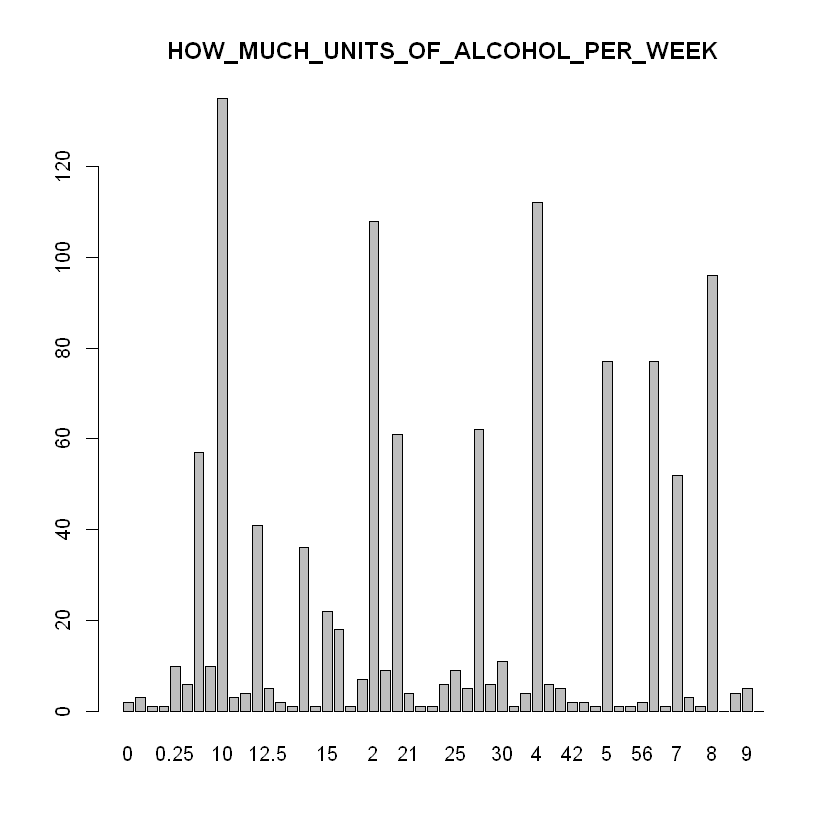

In [4]:

counts <- table(data$HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK)
barplot(counts, main="HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK")


In [19]:
#na.omit(data$HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK)
iv <- data$HOW_MUCH_UNITS_OF_ALCOHOL_PER_WEEK

iv[is.na(iv)] <- 0
data$AGE[is.na(data$AGE)] <- 0
iv[220] <- 0
iv[501] <- 0 
iv[971] <- 0

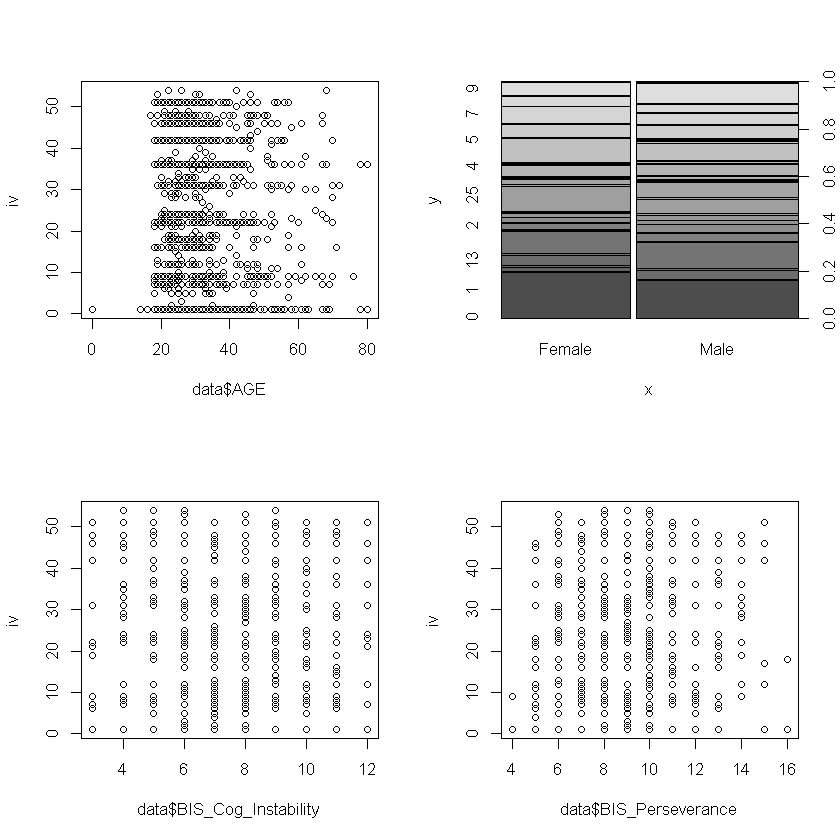

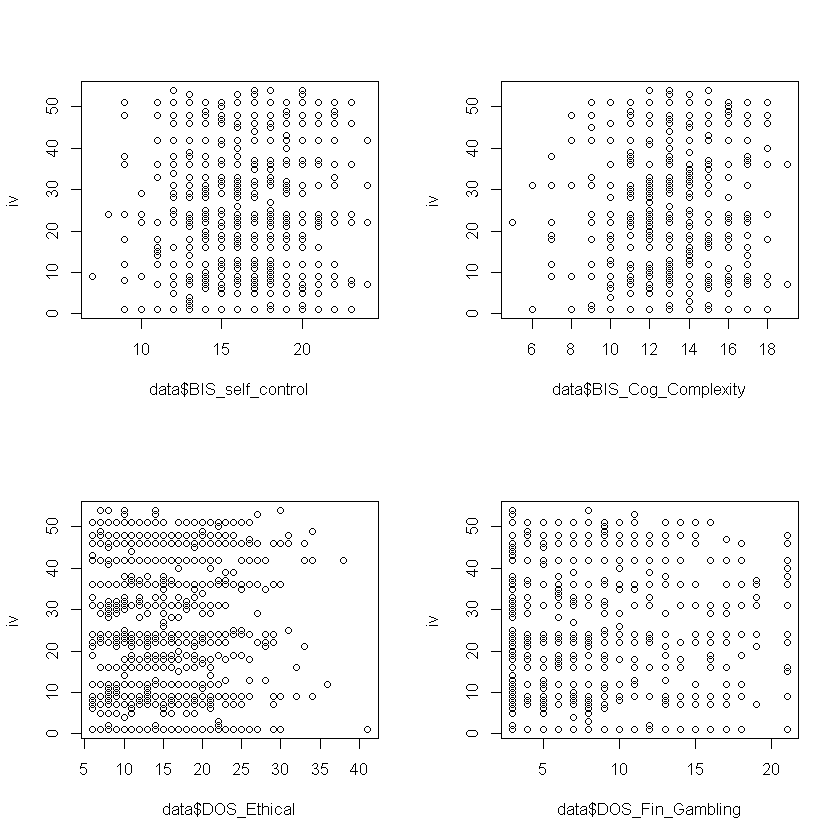

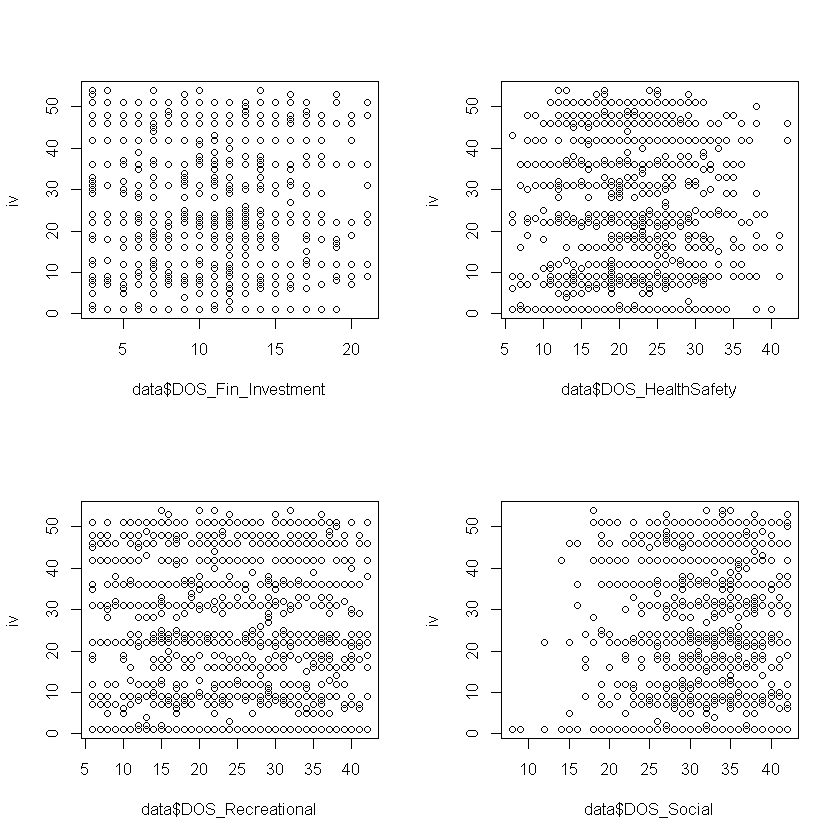

In [35]:
par(mfrow = c(2,2))
plot(data$AGE,iv)
plot(data$GENDER,iv)
plot(data$BIS_Cog_Instability,iv)
plot(data$BIS_Perseverance,iv)
plot(data$BIS_self_control,iv)
plot(data$BIS_Cog_Complexity,iv)
plot(data$DOS_Ethical,iv)
plot(data$DOS_Fin_Gambling,iv)
plot(data$DOS_Fin_Investment,iv)
plot(data$DOS_HealthSafety,iv)
plot(data$DOS_Recreational,iv)
plot(data$DOS_Social,iv)




Warning message in Ops.factor(iv, 200):
"'<=' not meaningful for factors"

[1] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [15] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [29] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [43] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [57] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [71] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [85] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
  [99] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [113] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [127] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [141] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [155] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [169] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [183] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [197] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [211] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [225] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [239] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [253] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [267] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [281] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [295] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [309] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [323] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [337] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [351] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [365] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [379] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [393] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [407] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [421] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [435] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [449] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [463] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [477] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [491] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [505] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [519] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [533] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [547] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [561] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [575] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [589] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [603] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [617] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [631] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [645] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [659] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [673] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [687] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [701] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
 [715] <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>

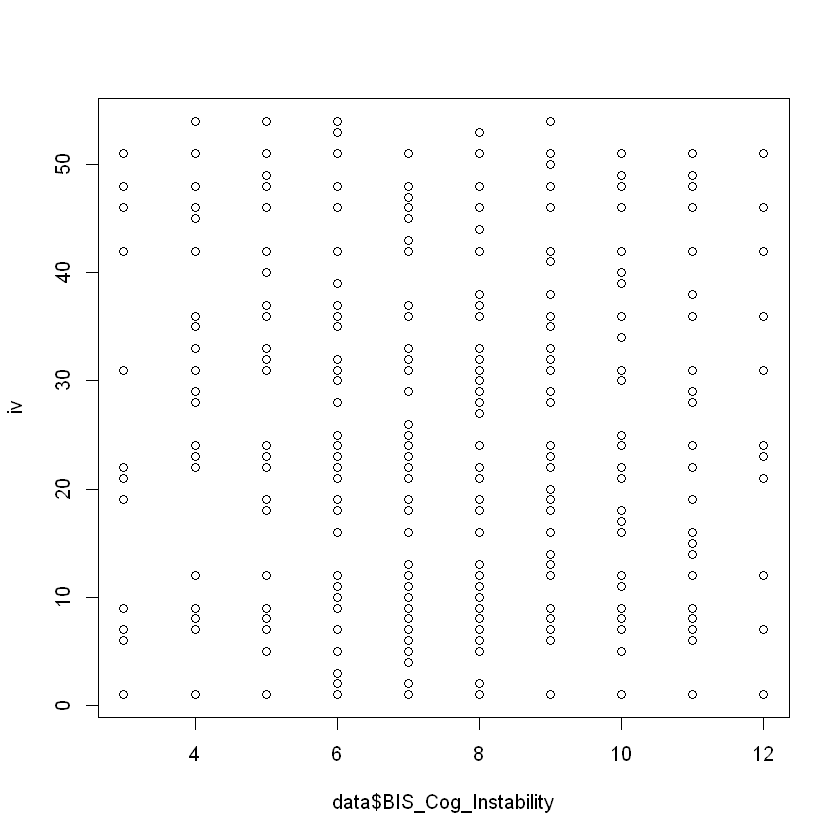

In [53]:
plot(data$BIS_Cog_Instability,iv)

myListFiltered <- iv[iv <= 200]
myListFiltered


